## - 불러올 패키지 목록

In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn import svm  # 서포트 벡터 머신 알고리즘 제공

# 사이파이 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 시각화를 위한 패키지
import seaborn as sb
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# Dataset 불러오기 및 data 정보 확인

## 데이터 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_credit = pd.read_csv('C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/credit_final.csv' )
df_credit

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,2,2,3,...,4,1,21,2,1,1,2,2,1,1
996,0,1,24,2,4,2303,1,4,4,3,...,1,1,45,2,2,1,3,1,1,1
997,0,3,21,3,4,12680,4,4,4,3,...,4,4,30,2,3,1,4,1,2,1
998,0,2,12,2,3,6468,4,1,2,3,...,1,4,52,2,2,1,4,1,2,1


In [3]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

# x값(예측변수), y값(목표변수) 설정
- SVM 에서는 NumPy array 형식의 데이터가 필요

In [4]:
# 목표변수와 나머지 변수들을 따로 저장

x = np.array( df_credit.iloc[: , 1:21] )
y = np.array( df_credit.iloc[:, 0 ] )

# 학습/테스트용 데이터셋 분리
- `sklearn.model_selection.train_test_split()`
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.30,
                                                      random_state = 153 )

# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({1: 495, 0: 205})

Counter({1: 205, 0: 95})


# 모델 생성 및 학습

## LinearSVC 모델 생성
- sklearn.svm: Support Vector Machines
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm
- 
- `sklearn.svm.SVC()`
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [6]:
model_svm = svm.SVC( kernel = 'rbf',
                     probability = True )  # ROC 계산을 위한 proba 산출을 위한 옵션

## train 데이터로 학습 수행
- `.fit()`
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.fit

In [7]:
model_svm.fit(x_train, y_train)

SVC(probability=True)

# 시각화

- `plot_decision_regions()`
- http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

ValueError: Filler values must be provided when X has more than 2 training features.

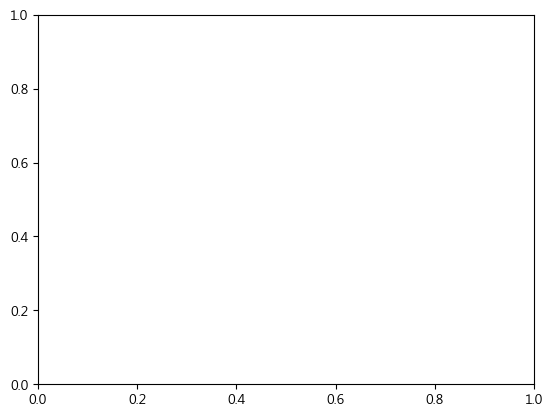

In [8]:
# Plotting decision regions
plot_decision_regions( x_train, y_train,
                       clf = model_svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

# 예측 및 평가

## 학습된 모델로 예측 수행
- `.predict()`
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict

In [101]:
# test 데이터로 라벨 예측
y_pred = model_svm.predict( x_test )

df_pred_result = pd.DataFrame( {'True' : y_test,
                                'Predict' : y_pred,
                                'Pred_Result' : y_test == y_pred} )
df_pred_result.head()

,True,Predict,Pred_Result
0,0,0,True
1,0,0,True
2,2,2,True
3,0,0,True
4,2,2,True


In [107]:
df_pred_result.groupby( ['True','Predict'] ).sum()

Pred_Result
True Predict             
0    0                 15
1    1                 13
2    1                  0
     2                 15

## 평가

### Confusion Metrix

In [69]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 15]], dtype=int64)

In [70]:
pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )

real,0,1,2
pred,,,
0,15,0,0
1,0,13,0
2,0,2,15


### 분석 지표
- `sklearn.metrics.accuracy_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- `sklearn.metrics.classification_report()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [71]:
# Accuracy
model_svm.score( x_test, y_test )

0.9555555555555556

In [72]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.9555555555555556

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      0.867     1.000     0.929        13
           2      1.000     0.882     0.938        17

    accuracy                          0.956        45
   macro avg      0.956     0.961     0.955        45
weighted avg      0.961     0.956     0.956        45




### 데이터별 예측 확률
- `.predict_proba()`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba

In [109]:
x_test

array([[1.3, 0.2],
       [1.5, 0.4],
       [5.6, 2.4],
       [1.4, 0.2],
       [4.9, 2. ],
       [1.5, 0.2],
       [5.8, 1.6],
       [5.9, 2.3],
       [5.1, 1.8],
       [5. , 1.5],
       [6.4, 2. ],
       [4.9, 1.8],
       [4.2, 1.3],
       [4. , 1.3],
       [1.4, 0.2],
       [4.5, 1.5],
       [5.8, 1.8],
       [4.5, 1.6],
       [1.6, 0.2],
       [4.7, 1.2],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.5, 0.2],
       [3.3, 1. ],
       [6.7, 2. ],
       [4.8, 1.8],
       [1.2, 0.2],
       [1.5, 0.4],
       [4.3, 1.3],
       [5.1, 1.9],
       [4.5, 1.5],
       [3.5, 1. ],
       [4. , 1. ],
       [1.5, 0.2],
       [5.3, 1.9],
       [1.1, 0.1],
       [1.5, 0.2],
       [4.5, 1.5],
       [4.5, 1.5],
       [4. , 1.3],
       [5.1, 2.3],
       [1.2, 0.2],
       [5.5, 1.8],
       [4.9, 1.8],
       [5.7, 2.3]])

In [73]:
proba = model_svm.predict_proba(x_test)

df_proba = pd.DataFrame( proba, columns = model_svm.classes_ )
df_proba.head()

,0,1,2
0,0.968574,0.021067,0.010359
1,0.944448,0.039994,0.015557
2,0.007340,0.010495,0.982165
3,0.962078,0.025990,0.011932
4,0.020102,0.264577,0.715321


### ROC curve / AUC
- `sklearn.metrics.roc_curve()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- `sklearn.metrics.RocCurveDisplay()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
- `sklearn.metrics.roc_auc_score()`
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [82]:
y_test

array([0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0,
       0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 2,
       2])

In [81]:
np.array( df_proba.iloc[:,0] )

array([0.96857418, 0.94444813, 0.00734023, 0.96207807, 0.02010177,
       0.95423876, 0.00906972, 0.00509396, 0.01708908, 0.01414667,
       0.00303969, 0.01855625, 0.01744343, 0.02535038, 0.96207807,
       0.01221587, 0.00862769, 0.01355715, 0.94479353, 0.00956296,
       0.95753311, 0.94479353, 0.95423876, 0.16310191, 0.00195067,
       0.01874771, 0.97395174, 0.94444813, 0.01463889, 0.01727034,
       0.01221587, 0.10929404, 0.03643095, 0.95423876, 0.01433611,
       0.98067235, 0.95423876, 0.01221587, 0.01221587, 0.02535038,
       0.0160796 , 0.97395174, 0.01189084, 0.01855625, 0.00681857])

AUC:  1.0


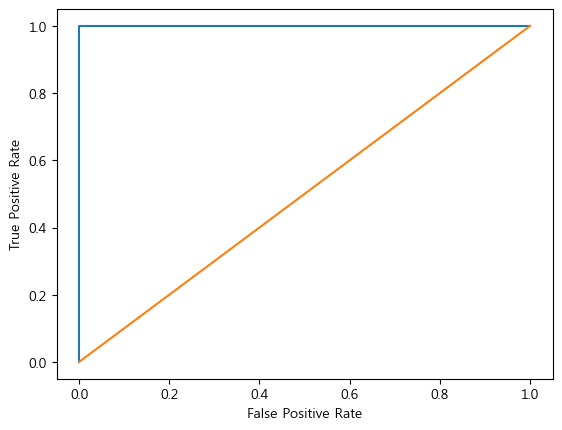

In [95]:
# AUC 계산
print('AUC: ', roc_auc_score( y_test, df_proba,
                              multi_class = 'ovo' ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, df_proba[0],
                                  pos_label=0)

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

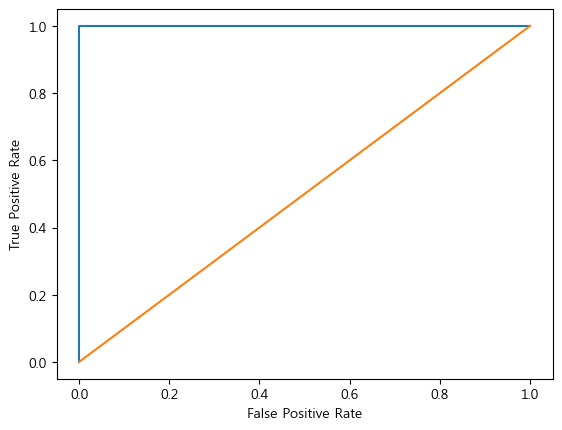

In [111]:


# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, df_proba[2],
                                  pos_label=2)

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

In [ ]:
# 'virginica' 에 대한 AUC 계산을 위해 y_test 의 범주형 리스트를 0과 1로 이원화
result_3 = y_test.apply(lambda x: 1 if 'virginica' == x else 0 )

# 'virginica' 에 대한 proba 추출'
proba_3 = df_proba['virginica']

# AUC 계산
print('AUC: ', roc_auc_score( result_3, proba_3 ) )

# ROC curve 출력
fpr, tpr, thresholds = roc_curve( y_test, proba_3,
                                  pos_label='virginica')

RocCurveDisplay( fpr, tpr).plot()

plt.plot( [0,1], [0,1],
          label = 'Random')
plt.show()

In [ ]:
pd.DataFrame( {'setosa':result_1,
               'proba_1':proba_1,
               'versicolor':result_2,
               'proba_2':proba_2,
               'virginica':result_3,
               'proba_3':proba_3} ).head()

In [ ]:
# 새로운 테스트 데이터로 예측하기
model_knn.predict( [ [5.1, 3.5, 4.0, 0.2] ] )